# **Training the model:**

### **Importing required packages**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Checking for gpu allocated by Google Collab**

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!nvidia-smi

Tue Apr 18 11:46:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### **Loading the training dataset**

In [ ]:
!mkdir dataset
%cd ./dataset

/content/dataset


In [ ]:
!wget https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded

--2023-04-18 11:47:05--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd [following]
--2023-04-18 11:47:06--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.218.97.155, 52.218.84.227, 52.218.80.187, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|52.218.97.155|

### **Renaming and unziping the loaded dataset**

In [ ]:
!mv file_downloaded dataset.zip

In [ ]:
!unzip ./dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (132).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1320).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1321).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1322).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1323).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1324).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1325).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1326).JPG  
  infl

### **Spliiting the dataset into Train, Test and Validation datasets**

In [ ]:
import os
import shutil
import random

In [ ]:
source_dir = './Plant_leave_diseases_dataset_with_augmentation'
train_dir = './train'
valid_dir = './valid'
test_dir = './test'

In [ ]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
for plant_name in os.listdir(source_dir):
    plant_dir = os.path.join(source_dir, plant_name)

    if os.path.isdir(plant_dir):
        images = os.listdir(plant_dir)
        random.shuffle(images)

        num_train = int(0.7 * len(images))
        num_valid = int(0.2 * len(images))

        train_images = images[:num_train]
        valid_images = images[num_train:num_train+num_valid]
        test_images = images[num_train+num_valid:]

        for img in train_images:
            src = os.path.join(plant_dir, img)
            dst = os.path.join(train_dir, plant_name, img)
            os.makedirs(os.path.dirname(dst), exist_ok=True)
            shutil.copyfile(src, dst)

        for img in valid_images:
            src = os.path.join(plant_dir, img)
            dst = os.path.join(valid_dir, plant_name, img)
            os.makedirs(os.path.dirname(dst), exist_ok=True)
            shutil.copyfile(src, dst)

        for img in test_images:
            src = os.path.join(plant_dir, img)
            dst = os.path.join(test_dir, plant_name, img)
            os.makedirs(os.path.dirname(dst), exist_ok=True)
            shutil.copyfile(src, dst)

### **Deleting unnecessary files**

In [ ]:
os.getcwd()

'/content/dataset'

In [ ]:
os.remove('dataset.zip')
shutil.rmtree('Plant_leave_diseases_dataset_with_augmentation')

### **Connecting GDrive to collab to save weight files and model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
weights_backup_dir = '/content/drive/MyDrive/plant_disease_identification/backup'

### **Dataset Preprocessing**

In [ ]:
img_size = 224
batch_size = 32

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    class_mode = 'categorical'
)

val_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

val_data = val_datagen.flow_from_directory(
    valid_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    class_mode = 'categorical'
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 43030 images belonging to 39 classes.
Found 12289 images belonging to 39 classes.
Found 6167 images belonging to 39 classes.


### **Transfer Learning for image classification using MobileNetV2 architecture as a base with pre-trained weights on ImageNet**

In [ ]:
base_model = keras.applications.MobileNetV2(
    input_shape = (img_size, img_size, 3),
    include_top = False,
    weights = 'imagenet'
)

for layer in base_model.layers:
    layer.trainable = False

model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(train_data.num_classes, activation = 'softmax')
])

9406464/9406464 [==============================] - 1s 0us/step


### **Summary of our Nueral Network Model**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 39)                20007     
                                                                 
Total params: 2,933,863
Trainable params: 675,879
Non-tr

### **Training Configuration for the model**

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

**Function to Monitor Validation Loss and stop training if loss doesn't improve:**

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=2
)

**Function to save the model weights after certain epochs to prevent data loss:**

In [ ]:
from keras.callbacks import ModelCheckpoint

# Define a file name format for the saved files
filepath = f"{weights_backup_dir}/saved_model_{{epoch:02d}}.h5"

# Define the checkpoint callback
checkpoint = ModelCheckpoint(
    filepath,
    monitor='val_loss',
    verbose=1,
    save_best_only=False,
    save_weights_only=True,
    mode='auto',
    save_freq=2
)

### **Training the model**

In [ ]:
epoch = 10

history = model.fit(
    train_data,
    epochs = epoch,
    validation_data = val_data,
    callbacks=[early_stop, checkpoint]
)

Streaming output truncated to the last 5000 lines.
 388/1345 [=======>......................] - ETA: 8:23 - loss: 0.3579 - accuracy: 0.8806
Epoch 2: saving model to /content/drive/MyDrive/plant_disease_identification/backup/saved_model_02.h5
 390/1345 [=======>......................] - ETA: 8:21 - loss: 0.3573 - accuracy: 0.8807
Epoch 2: saving model to /content/drive/MyDrive/plant_disease_identification/backup/saved_model_02.h5
 392/1345 [=======>......................] - ETA: 8:20 - loss: 0.3571 - accuracy: 0.8807
Epoch 2: saving model to /content/drive/MyDrive/plant_disease_identification/backup/saved_model_02.h5
 394/1345 [=======>......................] - ETA: 8:19 - loss: 0.3567 - accuracy: 0.8809
Epoch 2: saving model to /content/drive/MyDrive/plant_disease_identification/backup/saved_model_02.h5
 396/1345 [=======>......................] - ETA: 8:17 - loss: 0.3568 - accuracy: 0.8808
Epoch 2: saving model to /content/drive/MyDrive/plant_disease_identification/backup/saved_model_

# **Testing the Trained Model:**

### **Checking model's accuracy for the test datset:**

In [ ]:
model.evaluate(test_data)

193/193 [==============================] - 22s 113ms/step - loss: 0.2092 - accuracy: 0.9304


[0.20921175181865692, 0.9304361939430237]

**Model's Performance:**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

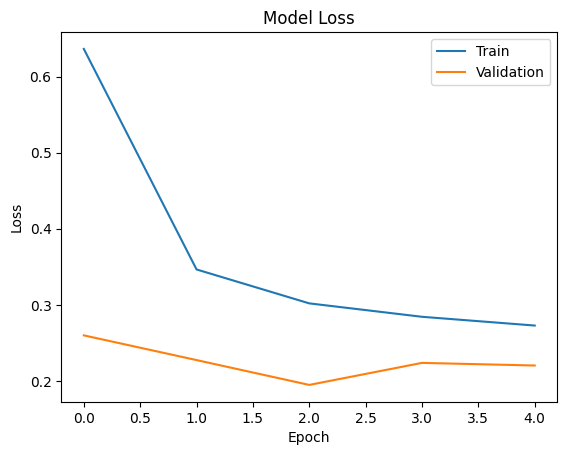

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

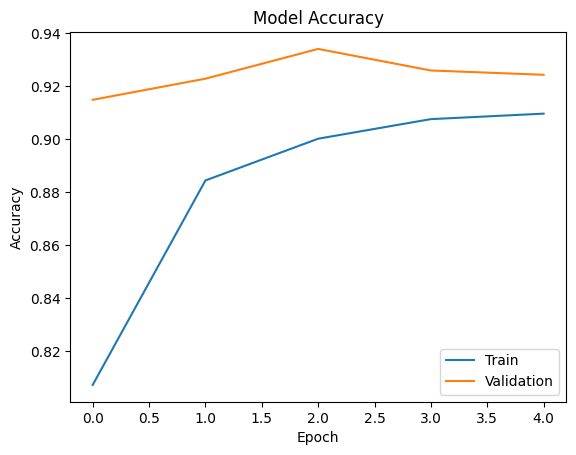

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

193/193 [==============================] - 17s 86ms/step


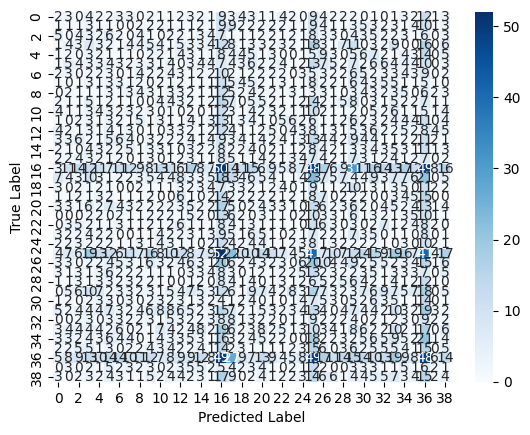

In [ ]:
y_pred = model.predict(test_data)
y_true = test_data.classes
y_pred = np.argmax(y_pred, axis = 1)

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_data, verbose = 2)

y_pred = model.predict(test_data)
y_true = test_data.classes

y_pred = np.argmax(y_pred, axis = 1)

cm = confusion_matrix(y_true, y_pred)

cr = classification_report(y_true, y_pred, target_names = test_data.class_indices.keys())

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', cr)

193/193 - 18s - loss: 0.2092 - accuracy: 0.9304 - 18s/epoch - 92ms/step
193/193 [==============================] - 17s 90ms/step
Test Loss: 0.20921161770820618
Test Accuracy: 0.9304361939430237
Confusion Matrix:
 [[ 2  0  2 ...  9  0  4]
 [ 1  1  1 ...  5  0  2]
 [ 2  1  2 ... 13  1  1]
 ...
 [10  8  7 ... 44  4  9]
 [ 1  1  1 ...  7  1  2]
 [ 1  2  1 ... 18  1  5]]
Classification Report:
                                                precision    recall  f1-score   support

                           Apple___Apple_scab       0.02      0.02      0.02       100
                            Apple___Black_rot       0.01      0.01      0.01       100
                     Apple___Cedar_apple_rust       0.02      0.02      0.02       100
                              Apple___healthy       0.03      0.03      0.03       165
                    Background_without_leaves       0.03      0.03      0.03       115
                          Blueberry___healthy       0.02      0.02      0.02       1

### **Testing the model on certain image of the leaf:**

In [ ]:
#Importing required modules:
import cv2
import numpy as np
from keras.models import load_model

In [ ]:
# Loading the trained model
# model = load_model('/content/drive/MyDrive/plant_disease_identification/model/saved_model.pb')

In [ ]:
#Changing the directory to the test image file location
!pwd
%cd /content/dataset/test/Apple___Black_rot

/content/dataset/test/Raspberry___healthy
/content/dataset/test/Apple___Black_rot


In [ ]:
# Loading the image
img = cv2.imread('image (113).JPG')

# Preprocessing the image
img = cv2.resize(img, (224, 224))
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Predicting the disease class
class_probs = model.predict(img)[0]
class_index = np.argmax(class_probs)

# Printing the predicted class name and index
class_names = ["Apple___Apple_scab", "Apple___Black_rot", "Apple___Cedar_apple_rust", "Apple___healthy", "Background_without_leaves", "Blueberry___healthy", "Cherry___healthy", "Cherry___Powdery_mildew", "Corn___Cercospora_leaf_spot Gray_leaf_spot", "Corn___Common_rust", "Corn___healthy", "Corn___Northern_Leaf_Blight", "Grape___Black_rot", "Grape___Esca_(Black_Measles)", "Grape___healthy", "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)", "Orange___Haunglongbing_(Citrus_greening)", "Peach___Bacterial_spot", "Peach___healthy", "Pepper,_bell___Bacterial_spot", "Pepper,_bell___healthy", "Potato___Early_blight", "Potato___healthy", "Potato___Late_blight", "Raspberry___healthy", "Soybean___healthy", "Squash___Powdery_mildew", "Strawberry___healthy", "Strawberry___Leaf_scorch", "Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___healthy", "Tomato___Late_blight", "Tomato___Leaf_Mold", "Tomato___Septoria_leaf_spot", "Tomato___Spider_mites Two-spotted_spider_mite", "Tomato___Target_Spot", "Tomato___Tomato_mosaic_virus", "Tomato___Tomato_Yellow_Leaf_Curl_Virus"]
predicted_class = class_names[class_index]
print(class_index)
print(predicted_class)


# **Saving the Trained Model:**

### **Saving trained model using model.save()**

In [ ]:
model.save("/content/drive/MyDrive/plant_disease_identification/model")

### **Saving the Trained Model using TensorflowJS**

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 73.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━

In [ ]:
!tensorflowjs_converter --input_format=keras /content/drive/MyDrive/plant_disease_identification/backup/saved_model_05.h5 /content/drive/MyDrive/plant_disease_identification/tfjs_model

2023-04-18 13:31:06.255940: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-04-18 13:31:06.256245: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-04-18 13:31:06.256274: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
